<a href="https://colab.research.google.com/github/panpepson/ML-AI-pep/blob/master/rozpoznaje-DW_k5_cats_dogs_d5_GPU_finito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

#dodatek z neta 
  #  https://github.com/tensorflow/models/tree/master/research/im2txt
  #  https://edouardfouche.com/Fun-with-Tensorflow-im2txt/



from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os 
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 

In [0]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip  -O /tmp/cats_and_dogs_filtered.zip

--2019-04-12 22:12:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 2404:6800:4008:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  87.0MB/s    in 0.8s    

2019-04-12 22:12:18 (87.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall(path='/tmp')
#zip_.extractall()
zip_.close()

In [0]:
!unzip /tmp/cats_and_dogs_filtered.zip -d /tmp/

Archive:  /tmp/cats_and_dogs_filtered.zip
replace /tmp/cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /tmp/cats_and_dogs_filtered/vectorize.py  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2117.jpg  
  inflating: /tmp/ca

In [0]:
!ls /tmp/

cats_and_dogs_filtered	cats_and_dogs_filtered.zip


In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats = os.path.join(validation_dir, 'cats')
validation_dogs = os.path.join(validation_dir, 'dogs')


In [0]:
#sciezka do kota i psa 
#było
  # all_cat_files = os.listdir( train_cats_dir )
  # cats_files = [os.path.join( train_cats_dir, file ) for file in all_cat_files][:25]
  # all_dog_files = os.listdir( train_dogs_dir )
  # dogs_files = [os.path.join( train_dogs_dir, file ) for file in all_dog_files][:25]

def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir( item_dir )
  item_files = [os.path.join( item_dir, file ) for file in all_item_dirs][:top]

  plt.figure(figsize=(10,10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx+1)
  
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
  plt.tight_layout()

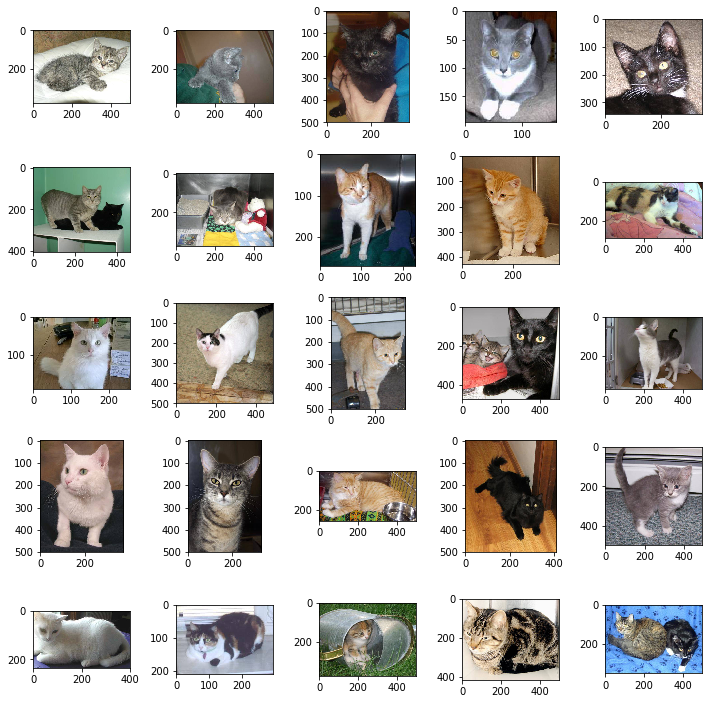

In [0]:
plot_images(train_cats_dir)

In [0]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32,(3,3), input_shape=input_shape),
    MaxPool2D(),
    
    Conv2D(64,(3,3), activation='relu'), # filtry
    MaxPool2D((2,2)),
    
    Conv2D(128,(3,3), activation='relu'), #było 64
    MaxPool2D((2,2)),
       
    
    Flatten(),
    
    Dense(128, activation='relu'), #wezly było 64
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36992)             0         
__________

In [0]:
#normalizacja danych 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150 ),
    batch_size = 20,
    class_mode = 'binary' 
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150 ),
    batch_size = 20,
    class_mode = 'binary' 
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20, 
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/20
50/50 [==============================] - 4s 71ms/step - loss: 0.6903 - acc: 0.5120
 - 10s - loss: 0.7065 - acc: 0.5115 - val_loss: 0.6903 - val_acc: 0.5120
Epoch 2/20
50/50 [==============================] - 3s 69ms/step - loss: 0.6679 - acc: 0.6030
 - 10s - loss: 0.6839 - acc: 0.5815 - val_loss: 0.6679 - val_acc: 0.6030
Epoch 3/20
50/50 [==============================] - 3s 68ms/step - loss: 0.6465 - acc: 0.6460
 - 10s - loss: 0.6647 - acc: 0.6295 - val_loss: 0.6465 - val_acc: 0.6460
Epoch 4/20
50/50 [==============================] - 3s 68ms/step - loss: 0.6397 - acc: 0.6570
 - 10s - loss: 0.6334 - acc: 0.6670 - val_loss: 0.6397 - val_acc: 0.6570
Epoch 5/20
50/50 [==============================] - 4s 71ms/step - loss: 0.6335 - acc: 0.6520
 - 10s - loss: 0.5783 - acc: 0.6970 - val_loss: 0.6335 - val_acc: 0.6520
Epoch 6/20
50/50 [==============================] - 3s 67ms/step - loss: 0.6411 - acc: 0.6570
 - 9s - loss: 0.5184 - acc: 0.7435 - val_loss: 0.6411 - val_acc: 0.6570

In [0]:
#from keras.models import load_model
#model.save('pep_model-01.h5')
#del model
#model = load_model('pep_model-01.h5')


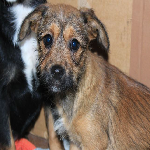

In [0]:
import requests
from io import BytesIO
from PIL import Image


#url_img = 'http://bi.gazeta.pl/im/c0/b1/14/z21698496V,Kot-chce-sie-ocierac--co-nie-jest-rownoznaczne-z-t.jpg'

url_img = 'https://apollo-ireland.akamaized.net/v1/files/ey8zjupgec842-PL/image;s=644x461'
#url_img = 'https://www.wykop.pl/cdn/c3201142/comment_OhTM6CPO3Ku1KY0oqOtU4G0mFl9UDqF1.jpg'
#url_img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfBbLX8iYmso0jBqhIDLCWzkayoWZvkYQkEh5_OxbNHh1d8tm2JA'

response = requests.get(url_img)
img = Image.open(BytesIO(response.content))
img = img.resize((150, 150))

img

In [0]:
from tensorflow.python.keras.preprocessing import image
import numpy as np 

X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X = X/255
X.shape


(1, 150, 150, 3)

In [0]:
y_pred = model.predict(X)

In [0]:
y_pred

array([[9.946554e-11]], dtype=float32)